<a href="https://colab.research.google.com/github/SujitbMusale/Mobile-Price-Range-Prediction-classification/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.

Data Description -

Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

# Importing data and data cleaning

In [ ]:
# importing the required libarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing csv file.
Mob_data=pd.read_csv("/content/drive/MyDrive/almabetter/capston project/Supervised Machine Learning - Classification/data_mobile_price_range.csv")

In [ ]:
Mob_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# check data shape
Mob_data.shape

(2000, 21)

In [ ]:
# lets check null value and variable type
Mob_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Whole data present in numeric varaible and also there is no any null value is the given data.

In [ ]:
# lets chcek Data statics.
Mob_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Here we can see that sc_w and px_height has minimum value 0. it is not possible that mobile with 0 screen width and pixcel with 0 height.

In [ ]:
# lets check the  count of zero value present in the both of this variable.
print(Mob_data[Mob_data['px_height']==0].shape[0])
print(Mob_data[Mob_data['sc_w']==0].shape[0])

2
180


So, px_height and sc_w are having 2 and 180 numbers of zero value respectively.
as px_height is just having 2 values as zero we can drop that rows easily.
and for sc_w we use Nearest Neighbour Imputations as Missing values are imputed using the k-Nearest Neighbors approach where a Euclidean distance is used to find the nearest neighbors.

In [ ]:
# Dropping px_height
Mob_data=Mob_data[Mob_data['px_height']!=0]

In [ ]:
#where ther is sc_W t is zero ,assigning mean values
Mob_data['sc_w'][Mob_data[Mob_data.sc_w == 0].index] =Mob_data.sc_w.mean()

In [ ]:
#checking whether there is duplicates or not
len(Mob_data[Mob_data.duplicated()])

0

In [ ]:
Mob_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1998 non-null   int64  
 1   blue           1998 non-null   int64  
 2   clock_speed    1998 non-null   float64
 3   dual_sim       1998 non-null   int64  
 4   fc             1998 non-null   int64  
 5   four_g         1998 non-null   int64  
 6   int_memory     1998 non-null   int64  
 7   m_dep          1998 non-null   float64
 8   mobile_wt      1998 non-null   int64  
 9   n_cores        1998 non-null   int64  
 10  pc             1998 non-null   int64  
 11  px_height      1998 non-null   int64  
 12  px_width       1998 non-null   int64  
 13  ram            1998 non-null   int64  
 14  sc_h           1998 non-null   int64  
 15  sc_w           1998 non-null   float64
 16  talk_time      1998 non-null   int64  
 17  three_g        1998 non-null   int64  
 18  touch_sc

AS there is no duplicate value and also no any null value so we are all set to perfom EDA.

#EDA

In [ ]:
# lets check the target variable counts.
print(Mob_data['price_range'].value_counts())

2    500
0    500
1    499
3    499
Name: price_range, dtype: int64


In [ ]:
Mob_data['price_range'].value_counts()

2    500
0    500
1    499
3    499
Name: price_range, dtype: int64

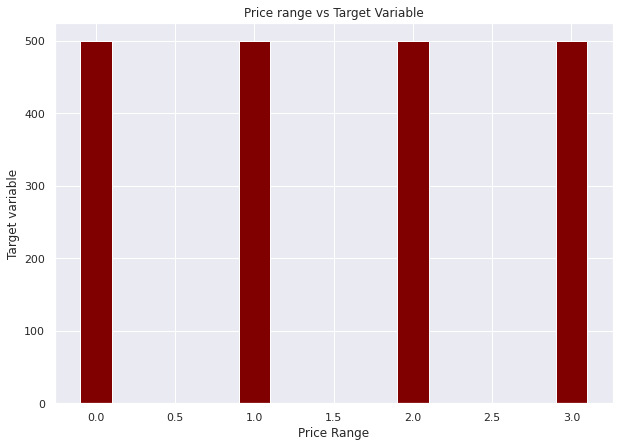

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.bar( Mob_data['price_range'],color ='maroon',width = 0.2,height=500)
plt.xlabel("Price Range")
plt.ylabel("Target variable")
plt.title("Price range vs Target Variable")
plt.show()

Here we can see that there is no Inbalanced in target variable.. as all values counts are almost equal

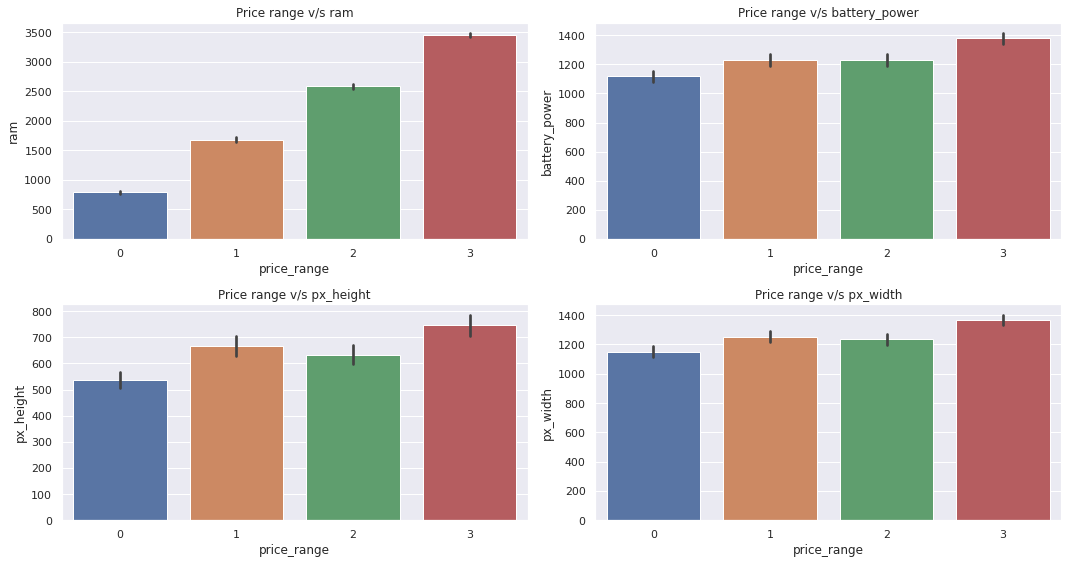

In [ ]:
# plotting  price_range vs other fearures
plt.figure(figsize=(15,8))
x=1
variables=['ram','battery_power','px_height','px_width']
for var in variables:
  plt.subplot(2,2,x)
  sns.barplot(x=Mob_data['price_range'],y=Mob_data[var])
  plt.title(f'Price range v/s {var}')
  x=x+1
  plt.tight_layout()

* we can see that from 1st graph that as Ram incereaes price also increase 
so we can say that they are having positive corellation is exist between two variable.
* Also In 2nd graph battary power and price having positive relation between them.
* for Pixal height and pixel width also having positive relation but for price range 1 and 2 you can see pxal height and pixel width are not having any significant impact on mobile price.

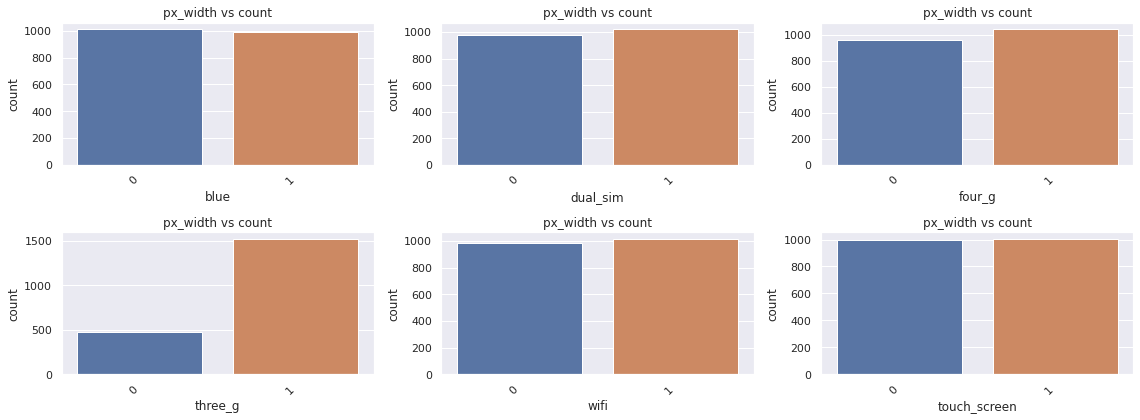

In [ ]:
# univariate analysis of binary categorical variables
bin_var= ['blue','dual_sim','four_g','three_g','wifi','touch_screen']
i=1
fig = plt.figure(figsize= (16,6))
for col in (bin_var):
    ax=fig.add_subplot(2,3,i)
    sns.countplot(x=Mob_data[col], ax=ax)
    plt.xticks(rotation=45, ha='right')
    i=i+1
    plt.title(f'{var} vs count')
plt.tight_layout()
plt.show()

*  Here we can see that 1 means mobile has that specification and 0 means that specification is not avilable for that mobile.
*  here most of all binary variables are having 50% of the feature except three_g almost 25% features are not having three_g and 75% are having three_g.


In [ ]:
# lets check the distribution of numerical column along with outliers
# lets take the numerical column list
n_col=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height',
             'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',]

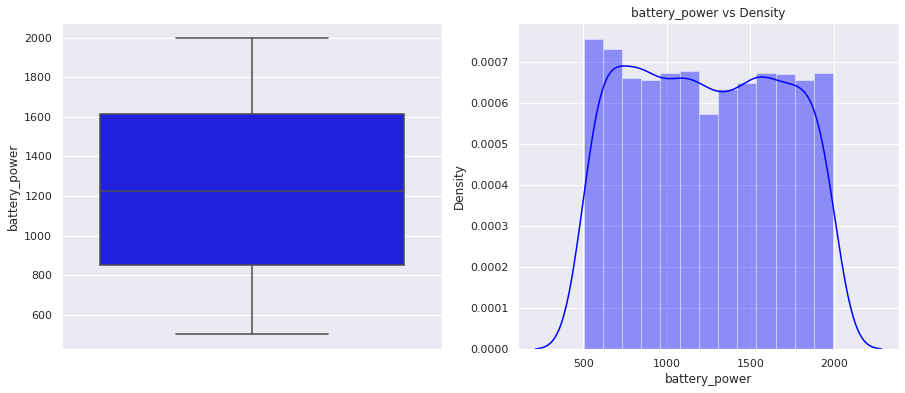

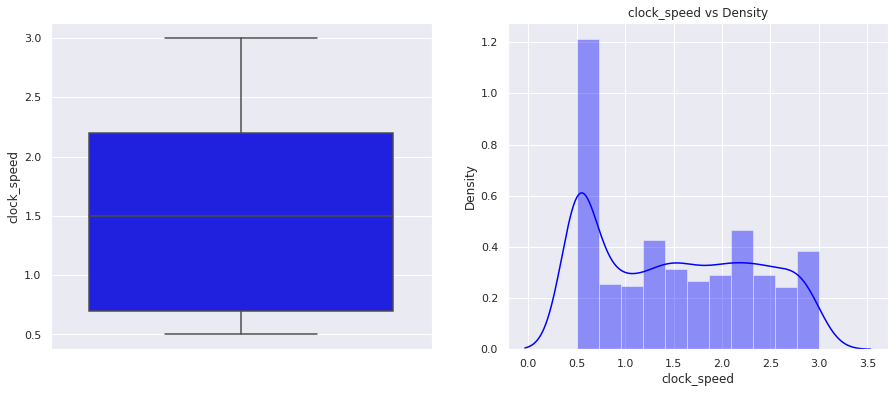

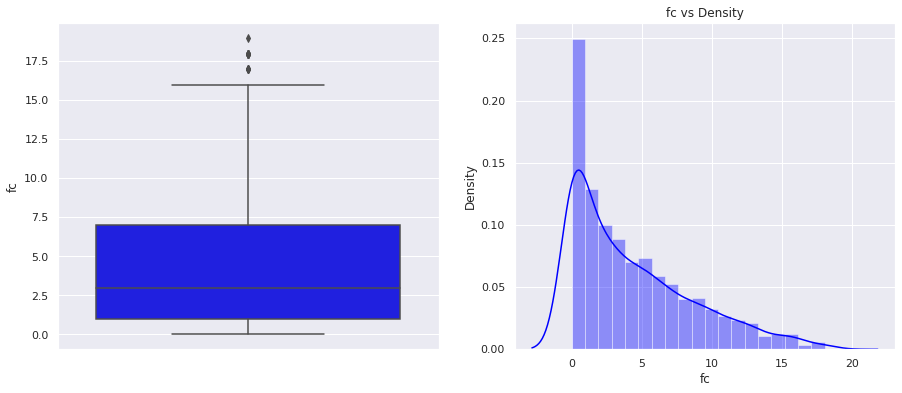

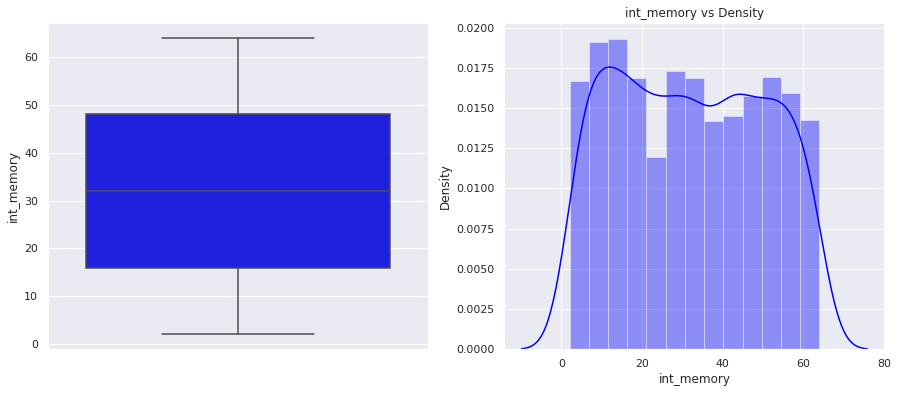

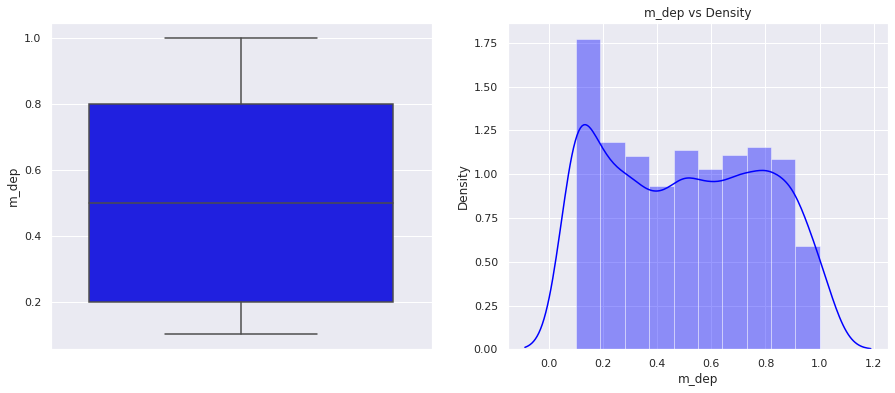

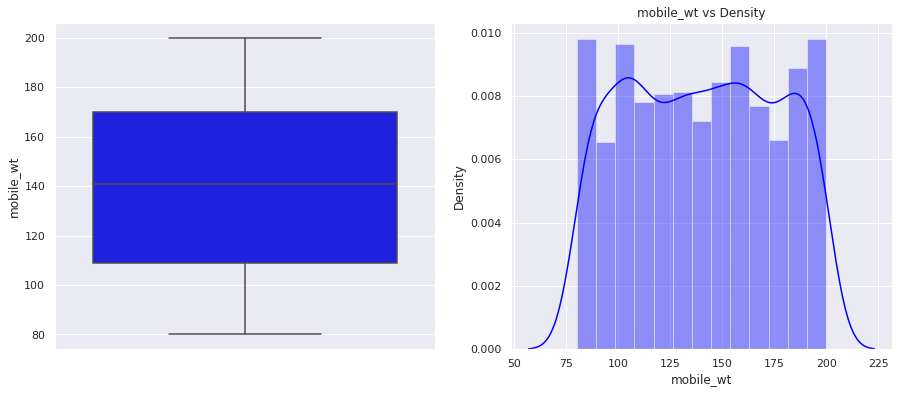

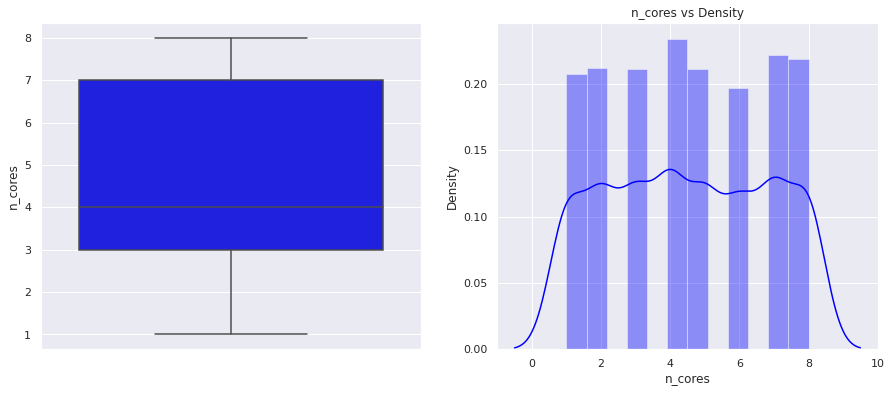

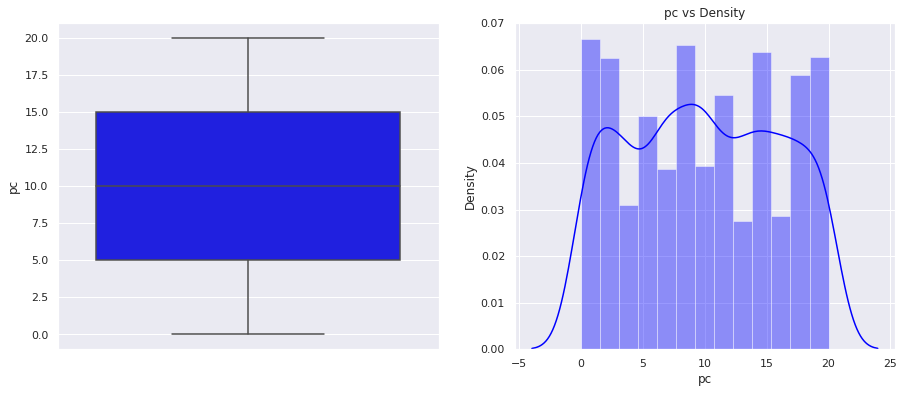

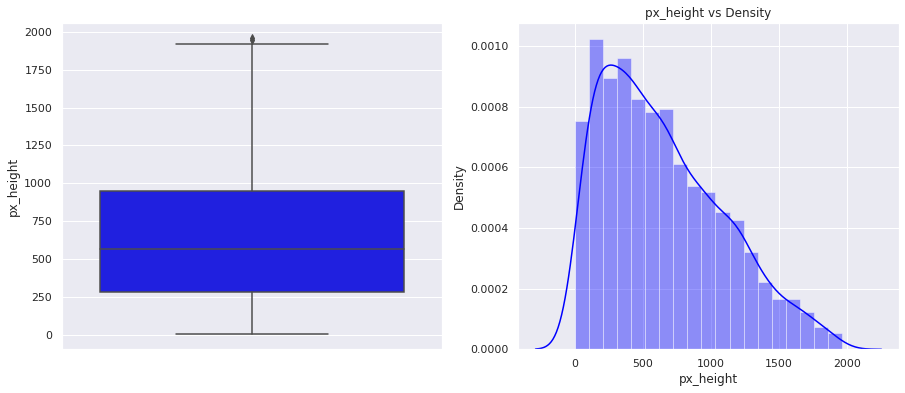

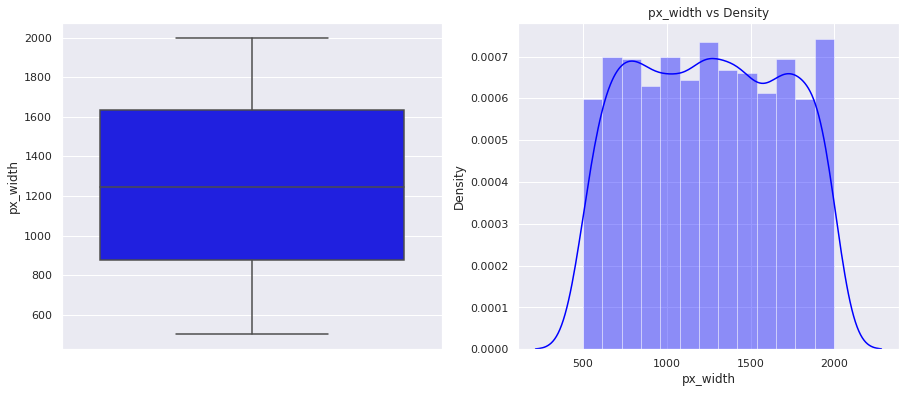

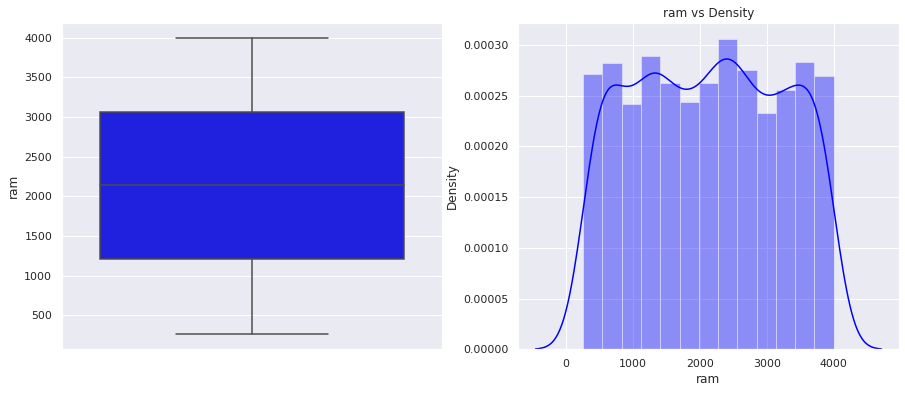

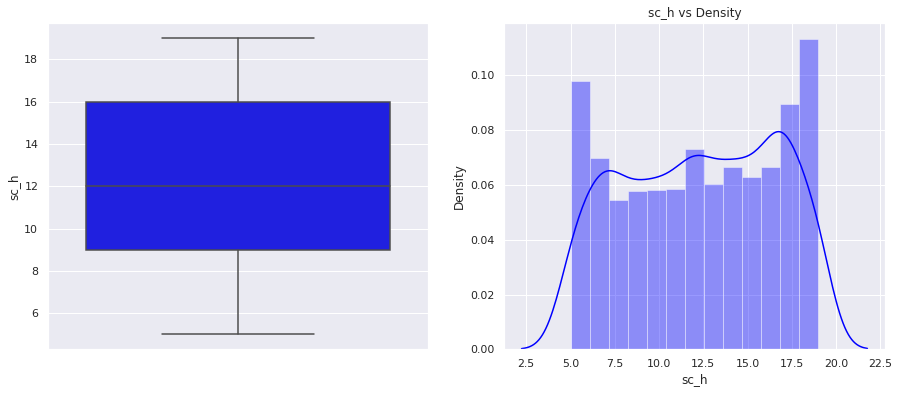

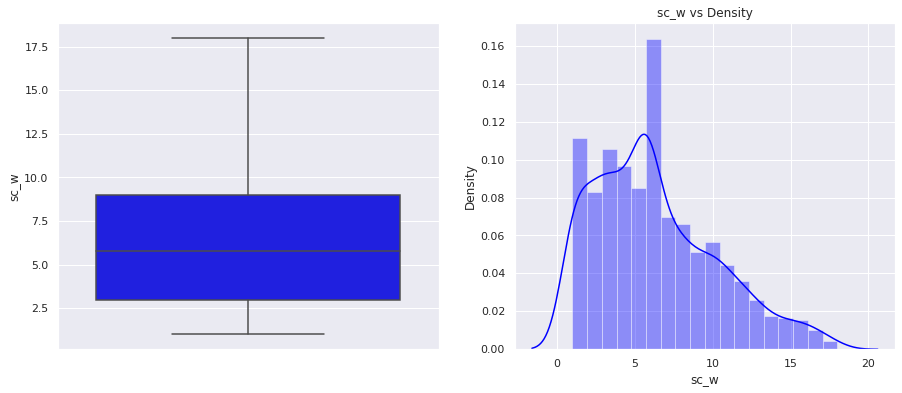

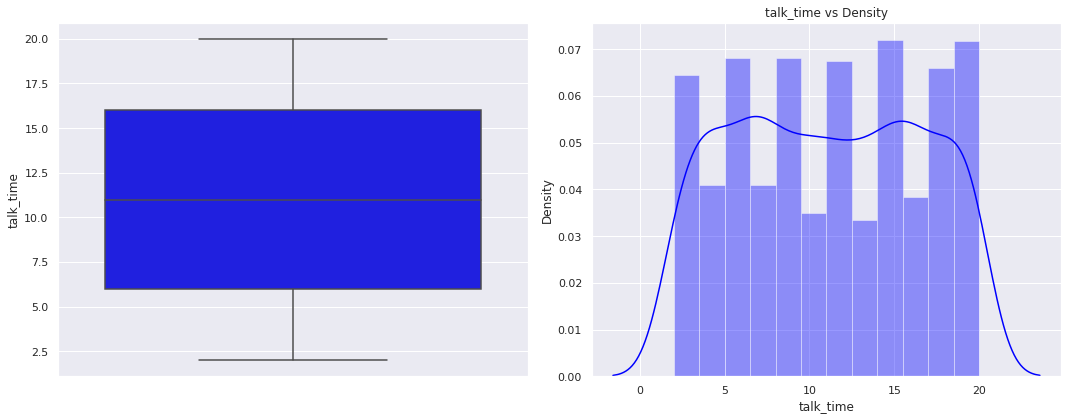

In [ ]:
# plotting boXplot and distribution
for var in n_col:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 2)
    fig = sns.distplot(Mob_data[var],color='blue')
    fig.set_xlabel(var)
    fig.set_title(f'{var} vs Density')
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=Mob_data[var],color='blue')
    fig.set_ylabel(var)
plt.tight_layout()
plt.show()

Here we can see that px_height fc has some outliers.
otherwise data is well distributed.

In [ ]:
# lets do oulier treatment here we can see only two type of feature are having outlier so we will drop that data which is coming after quartile.
# here data is having outlier at upper quartile only so we will drop only that data.
Mob_data = Mob_data[(Mob_data['fc'] <= Mob_data['fc'].quantile(0.991))]

In [ ]:
Mob_data = Mob_data[(Mob_data['px_height'] <= Mob_data['px_height'].quantile(0.991))]

In [ ]:
Mob_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7.0,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3.0,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2.0,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8.0,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2.0,15,1,1,0,1


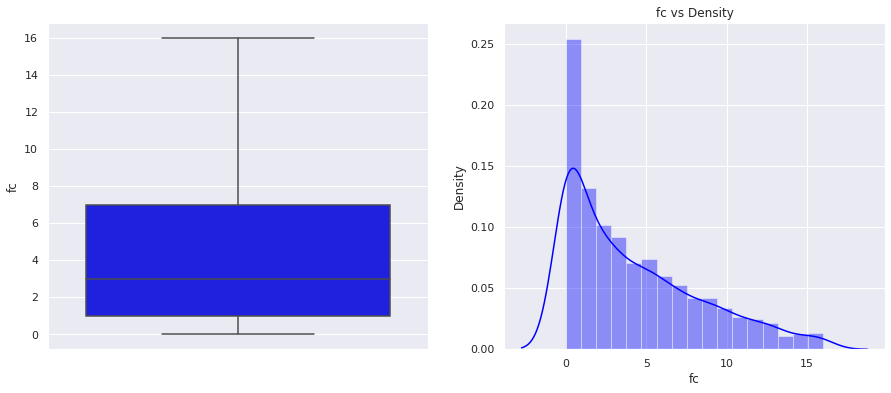

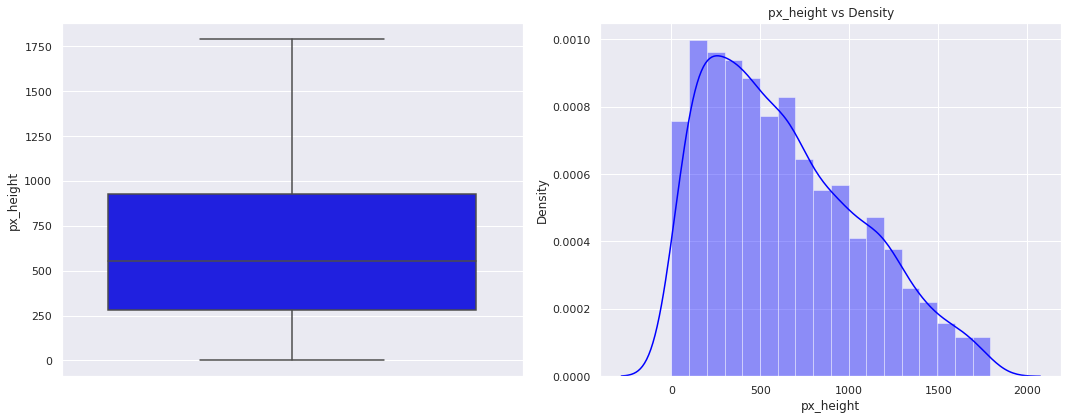

In [ ]:
# lets have a cross check for outliers in both feature.
cross_n_col=['fc','px_height']
for var in cross_n_col:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 2)
    fig = sns.distplot(Mob_data[var],color='blue')
    fig.set_xlabel(var)
    fig.set_title(f'{var} vs Density')
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=Mob_data[var],color='blue')
    fig.set_ylabel(var)
plt.tight_layout()
plt.show()

Now we can see that the there is no outlier present

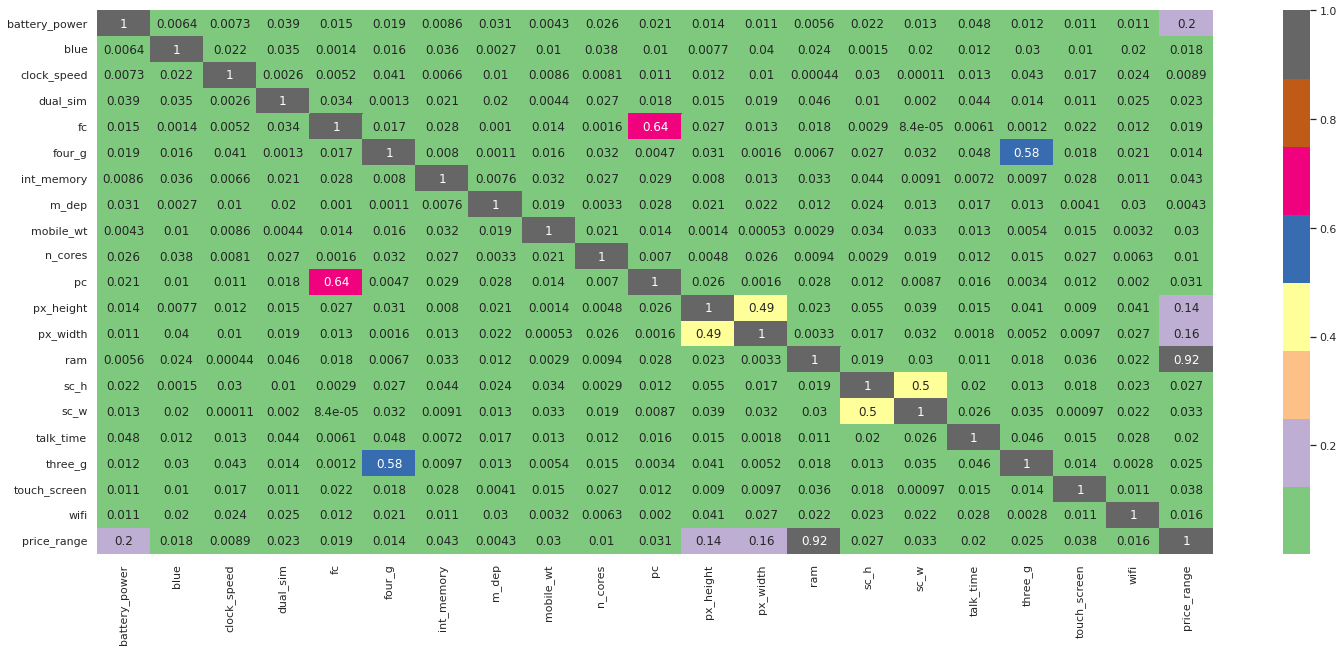

In [ ]:
# lets check the correlation between variables by using heatmap.
plt.figure(figsize=(25,10))
sns.heatmap(data=abs(Mob_data.corr()),annot=True,cmap=plt.cm.Accent)

RAM and price_range shows high correlation which is a good sign, it signifies that RAM will play major deciding factor in estimating the price range.

There is some collinearity in feature pairs ('pc', 'fc') and ('px_width', 'px_height'). Both correlations are justified since there are good chances that if front camera of a phone is good, the back camera would also be good.

Also, if px_height increases, pixel width also increases, that means the overall pixels in the screen. We can replace these two features with one feature. Front Camera megapixels and Primary camera megapixels are different entities despite of showing colinearity. So we'll be keeping them as they are.

lets convert 'sc_h and 'sc_w' to 'sc_size' by multiplying to each other.

In [ ]:
# Defining new variable sc_size

Mob_data['sc_size'] = np.sqrt((Mob_data['sc_h']**2) + (Mob_data['sc_w']**2))
Mob_data['sc_size'] = round(Mob_data['sc_size']/2.54, 2)
# Let's drop sc_h and s_w

Mob_data.drop(['sc_h', 'sc_w'], axis = 1, inplace = True)


In [ ]:
#  defining new variable for pixels
Mob_data['pixels'] = Mob_data['px_height']*Mob_data['px_width']
# Dropping px_height and px_width
Mob_data.drop(['px_height', 'px_width'], axis = 1, inplace = True)


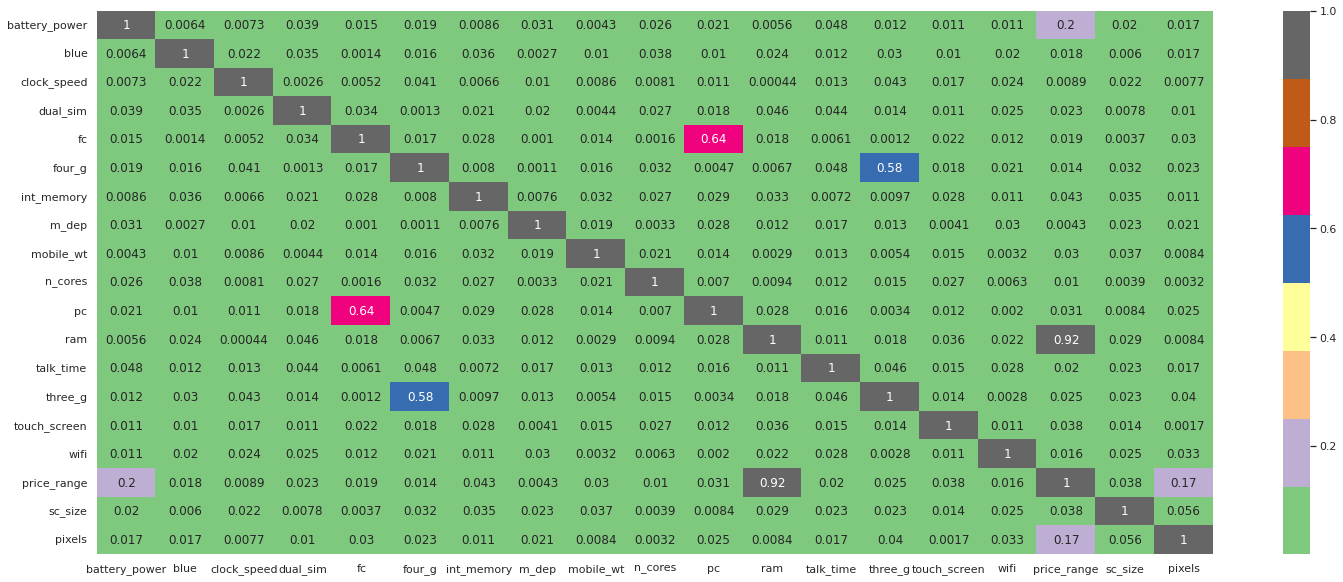

In [ ]:
# lets check again the correlation between variables by using heatmap.
plt.figure(figsize=(25,10))
sns.heatmap(data=abs(Mob_data.corr()),annot=True,cmap=plt.cm.Accent)

# Modeling

In [ ]:
# lets import libraries required for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix,confusion_matrix,roc_curve,roc_auc_score,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [ ]:
# lets Separat X variables(indpendent variables) and Y(dependent variable) variable.
X=Mob_data.drop('price_range',axis=1)
y=Mob_data["price_range"]

In [ ]:
# lets check the shape of X and y
print(X.shape)
print(y.shape)


(1962, 18)
(1962,)


In [ ]:
# As we know the Decison tree is tree based model we will not required scaling for this.
# splitting the data into Train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


#1. Decision Tree

In [ ]:
# Creating object of the decision tree.
DTC=DecisionTreeClassifier(random_state=42)

In [ ]:
#Lets fit the training data
DTC.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predicting y values of train data and test data.
y_train_pred=DTC.predict(X_train)
y_pred=DTC.predict(X_test)

In [ ]:
# Checking train set accuracy.
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
# Checking test set accuracy
accuracy_score(y_test,y_pred)

0.8441358024691358

[[141  17   0   0]
 [ 12 135  17   0]
 [  0  18 125  20]
 [  0   0  17 146]]


[Text(0, 0.5, 'low cost'),
 Text(0, 1.5, 'medium cost'),
 Text(0, 2.5, 'high cost'),
 Text(0, 3.5, 'very high cost')]

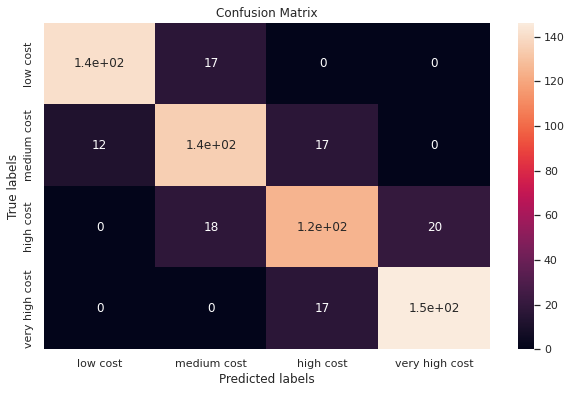

In [ ]:
# Get the confusion matrix for both train and test
plt.figure(figsize=(10,6))
labels = ['low cost','medium cost', 'high cost', 'very high cost']
cm = confusion_matrix(y_test, y_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

as we can see that train set accuracy is 100% and test set accuracy is 84.41 %
we can say that model is overfitting to training data set. so, by using hyper parameter tuning we will reduce over fitting

In [ ]:
# hyper parameter tuning.
# applying GridSearchCv and fitting the model with it.
dtc_tune=GridSearchCV(DTC,param_grid={'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)},cv=5,scoring='accuracy',verbose=24)
dtc_tune.fit(X_train,y_train) 

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 1/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.795 total time=   0.0s
[CV 2/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 2/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.810 total time=   0.0s
[CV 3/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 3/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.802 total time=   0.0s
[CV 4/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 4/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.779 total time=   0.0s
[CV 5/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 5/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.798 total time=   0.0s
[CV 1/5; 2/4] START max_depth=5, max_leaf_nodes=100.............................
[CV 1/5; 2/4] END max_depth=5, max_leaf_node

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)},
             scoring='accuracy', verbose=24)

In [ ]:
# getting best parameters for model.
dtc_tune.best_params_


{'max_depth': 5, 'max_leaf_nodes': 100}

In [ ]:
# getting best estimators
dtc_tune.best_estimator_

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=100, random_state=42)

In [ ]:
# using best parameters and training the the data.
DTC_optimal=DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10,max_leaf_nodes=100,random_state=42)
DTC_optimal.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=100,
                       min_samples_split=10, random_state=42)

In [ ]:
# predicting y values of train and test set.
y_train_pred=DTC_optimal.predict(X_train)
y_pred=DTC_optimal.predict(X_test)

In [ ]:
# Checking the accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

0.8797564687975646

In [ ]:
# Checking the accuarcy score of test set.
accuracy_score(y_test,y_pred)

0.8472222222222222


train accuracy reduced to 87.97% which means overfitting is reduced. and also test accuracy increased from 84.12 to 84.72 , we can say that this model is  good.

[[149   9   0   0]
 [ 11 144   9   0]
 [  0  35 110  18]
 [  0   0  17 146]]


[Text(0, 0.5, 'low cost'),
 Text(0, 1.5, 'medium cost'),
 Text(0, 2.5, 'high cost'),
 Text(0, 3.5, 'very high cost')]

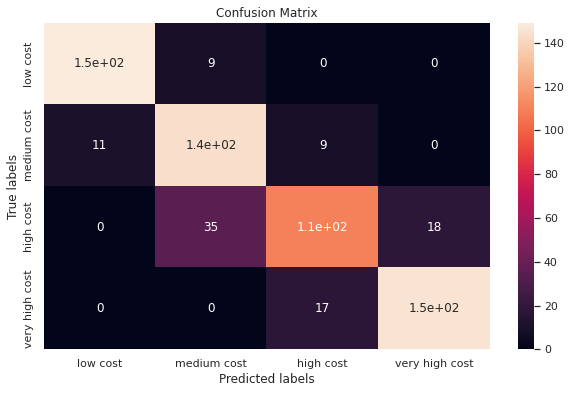

In [ ]:
# Get the confusion matrix for both train and test
plt.figure(figsize=(10,6))
labels = ['low cost','medium cost', 'high cost', 'very high cost']
cm = confusion_matrix(y_test, y_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# lets chcek with evaluation matrix which is used for classification
print('classification report for train data')
print(classification_report(y_train,y_train_pred))
print('classification report for test data')
print(classification_report(y_test,y_pred))

classification report for train data
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       336
           1       0.80      0.89      0.85       327
           2       0.89      0.73      0.80       328
           3       0.91      0.93      0.92       323

    accuracy                           0.88      1314
   macro avg       0.88      0.88      0.88      1314
weighted avg       0.88      0.88      0.88      1314

classification report for test data
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       158
           1       0.77      0.88      0.82       164
           2       0.81      0.67      0.74       163
           3       0.89      0.90      0.89       163

    accuracy                           0.85       648
   macro avg       0.85      0.85      0.85       648
weighted avg       0.85      0.85      0.85       648



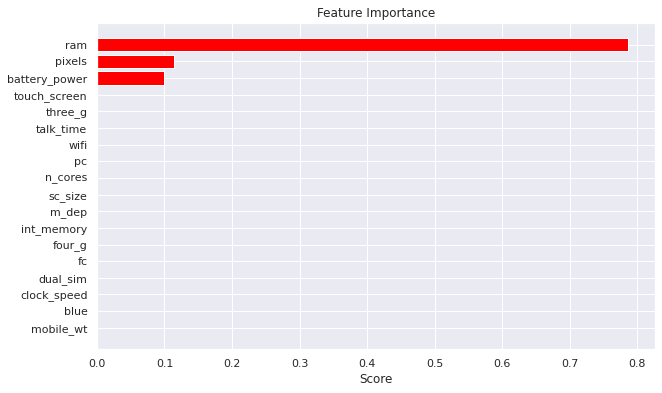

In [ ]:
# creating a function for plotting the feature importances.
plt.figure(figsize=(10,6))
features = X.columns
importances = DTC_optimal.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Score')
plt.show()

Here above three feature namely 'ram' , 'battery_power' , 'pixels'. are important features.

In [ ]:
# Defining a fucnction for plotting roc curve
def plot_Auc_roc(y_test,pred_prob):
  '''It will take y_test and y predicted probabilities
  as input and will plot the roc curve.'''

  fpr = {}
  tpr = {}
  thresh ={}

  n_class = 4

  for i in range(n_class):    
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
      
  # plotting    
  plt.figure(figsize=(12,8))
  plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label= ((f'Class 0(Low cost) vs Rest, AUC= {round(auc(fpr[0],tpr[0]),4)}')))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=((f'Class 1(Medium cost) vs Rest, AUC= {round(auc(fpr[1],tpr[1]),4)}')))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=((f'Class 2(High cost) vs Rest, AUC= {round(auc(fpr[2],tpr[2]),4)}')))
  plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label=((f'Class 3(Very High cost) vs Rest, AUC= {round(auc(fpr[3],tpr[3]),4)}')))
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('Multiclass ROC',dpi=300);

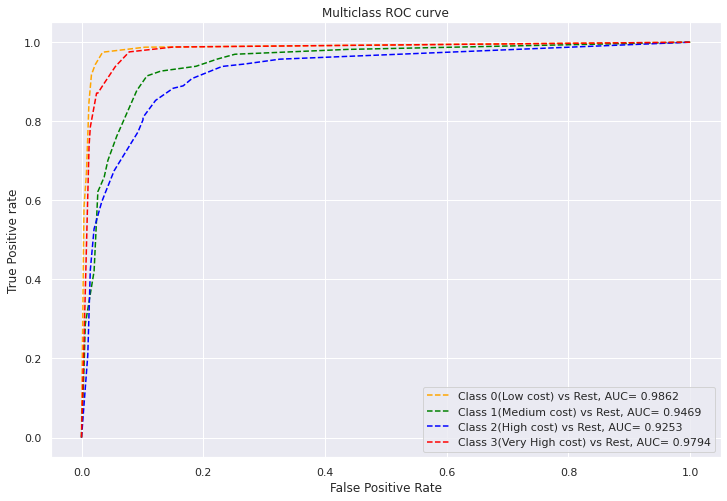

In [ ]:
# Calculate roc_auc score on train set
pred_prob = DTC_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

we can see that model is classified for class 0 and class 3 up to 0.98. where as for class 1 and class 2 AUC are low as compaired to 0 and 3.

# 2. Random Forest classifier

In [ ]:
# Scaling values of X
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# splitting the data into Train data and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [ ]:
# creating an object of the Random_forest_classifier.
RFC=RandomForestClassifier(random_state=0)

In [ ]:
# fitting/training the model.
RFC.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# predicting the y values of train set and test set.
y_train_pred=RFC.predict(X_train)
y_pred=RFC.predict(X_test)


In [ ]:
# Checking the accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
# Checking the accuracy score of test set.
accuracy_score(y_test,y_pred)


0.8657407407407407

as we can see that train set accuracy is 100% and test set accuracy is 86.57 %
we can say that model is overfitting to training data set. so, by using hyper parameter tuning we will reduce over fitting

[[153   5   0   0]
 [ 13 136  15   0]
 [  0  24 127  12]
 [  0   0  18 145]]


[Text(0, 0.5, 'low cost'),
 Text(0, 1.5, 'medium cost'),
 Text(0, 2.5, 'high cost'),
 Text(0, 3.5, 'very high cost')]

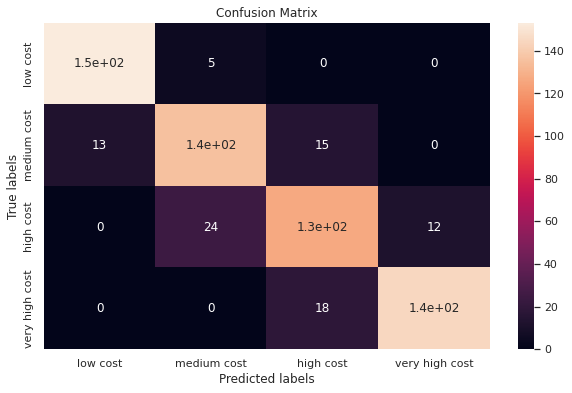

In [ ]:
# Get the confusion matrix for both train and test
plt.figure(figsize=(10,6))
labels = ['low cost','medium cost', 'high cost', 'very high cost']
cm = confusion_matrix(y_test, y_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Applying GridSearchCV
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
rfc_tune = GridSearchCV(RFC, param_grid = grid_values, scoring = 'roc_auc', cv=5)
# Fit the object to train dataset
rfc_tune.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='roc_auc')

In [ ]:
#Getting best paramters for the models
rfc_tune.best_params_

{'max_depth': 3, 'n_estimators': 50}

In [ ]:
#Getting best estimator for the models
rfc_tune.best_estimator_

RandomForestClassifier(max_depth=3, n_estimators=50, random_state=0)

In [ ]:
# fitting/training the data with best parameters.
rfc_optimal=RandomForestClassifier(max_features='auto',criterion='entropy',max_depth=3,n_estimators=50,random_state=0)
rfc_optimal.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=50,
                       random_state=0)

In [ ]:
# predicting y values of train and test set.
y_train_pred=rfc_optimal.predict(X_train)
y_pred=rfc_optimal.predict(X_test)

In [ ]:
# checking the train accuracy score.
accuracy_score(y_train,y_train_pred)

0.7929984779299848

In [ ]:
# checking the test accuracy score.
accuracy_score(y_test,y_pred)

0.7407407407407407

In [ ]:
# lets chcek with evaluation matrix which is used for classification
print('classification report for train data')
print(classification_report(y_train,y_train_pred))
print('classification report for test data')
print(classification_report(y_test,y_pred))

classification report for train data
              precision    recall  f1-score   support

           0       0.80      0.99      0.89       336
           1       0.76      0.62      0.68       327
           2       0.79      0.59      0.67       328
           3       0.81      0.96      0.88       323

    accuracy                           0.79      1314
   macro avg       0.79      0.79      0.78      1314
weighted avg       0.79      0.79      0.78      1314

classification report for test data
              precision    recall  f1-score   support

           0       0.76      0.96      0.85       158
           1       0.67      0.57      0.62       164
           2       0.72      0.48      0.58       163
           3       0.78      0.95      0.86       163

    accuracy                           0.74       648
   macro avg       0.73      0.74      0.73       648
weighted avg       0.73      0.74      0.73       648



[[152   6   0   0]
 [ 48  94  22   0]
 [  0  41  79  43]
 [  0   0   8 155]]


[Text(0, 0.5, 'low cost'),
 Text(0, 1.5, 'medium cost'),
 Text(0, 2.5, 'high cost'),
 Text(0, 3.5, 'very high cost')]

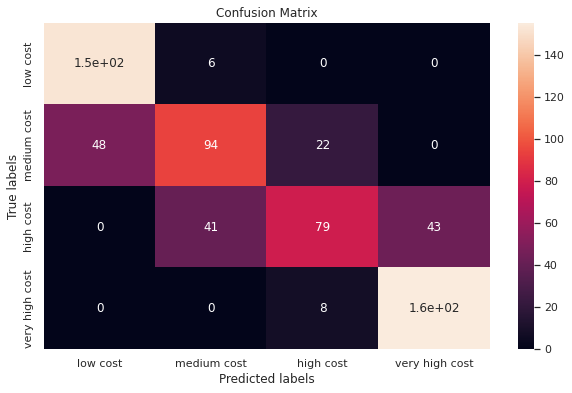

In [ ]:
# Get the confusion matrix for both train and test
plt.figure(figsize=(10,6))
labels = ['low cost','medium cost', 'high cost', 'very high cost']
cm = confusion_matrix(y_test, y_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Here we can see that the Train accuracy is decrease to 79.29% and also we note test accuracy is drcreased to 74.07% its seems model si not good as last model.

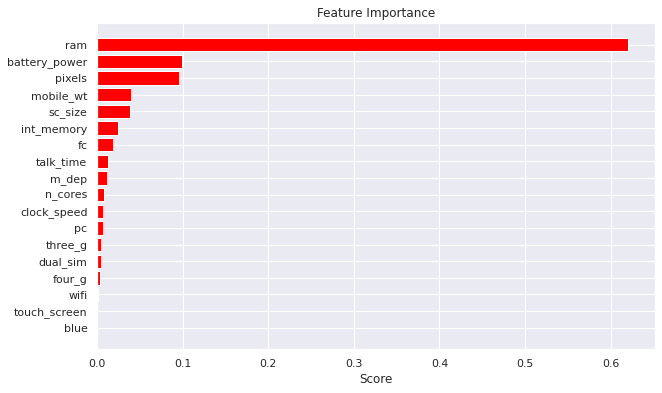

In [ ]:
# creating a function for plotting the feature importances.
plt.figure(figsize=(10,6))
features = X.columns
importances = rfc_optimal.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Score')
plt.show()

Here 'mobile_wt and 'sc_size' showing some important along with 'ram','battery_power' and 'pixel'.

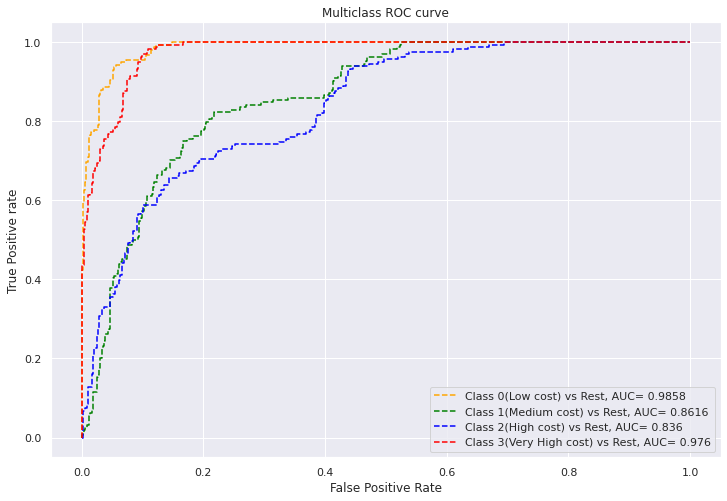

In [ ]:
# Calculate roc_auc score on train set
pred_prob = rfc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

here class 0 ,class 3 both are havining significance differecnce with class 1 and class 2.

# 3. Gradient Boosting Classifier

In [ ]:
# Scaling values of X
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# splitting the data into Train data and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [ ]:
# creating an object of the Random_forest_classifier.
GBC=GradientBoostingClassifier(random_state=0)

In [ ]:
# fitting/training the model.
GBC.fit(X_train,y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
# predicting the y values of train set and test set.
y_train_pred=GBC.predict(X_train)
y_pred=GBC.predict(X_test)

In [ ]:
# Checking the accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
# Checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.8935185185185185

as we can see that train set accuracy is 100% and test set accuracy is 89.35 %
we can say that model is overfitting to training data set. so, by using hyper parameter tuning we will reduce over fitting

[[152   6   0   0]
 [  7 147  10   0]
 [  0  17 134  12]
 [  0   0  17 146]]


[Text(0, 0.5, 'low cost'),
 Text(0, 1.5, 'medium cost'),
 Text(0, 2.5, 'high cost'),
 Text(0, 3.5, 'very high cost')]

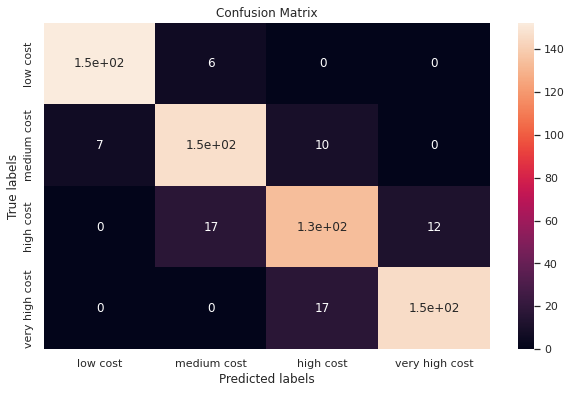

In [ ]:
# Get the confusion matrix for both train and test
plt.figure(figsize=(10,6))
labels = ['low cost','medium cost', 'high cost', 'very high cost']
cm = confusion_matrix(y_test, y_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Applying GridSearchCV
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
gbc_tune = GridSearchCV(GBC, param_grid = grid_values, scoring = 'roc_auc', cv=5)
# Fit the object to train dataset
gbc_tune.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='roc_auc')

In [ ]:
#Getting best paramters for the models
gbc_tune.best_params_

{'max_depth': 3, 'n_estimators': 50}

In [ ]:
#Getting best estimator for the models
gbc_tune.best_estimator_

GradientBoostingClassifier(n_estimators=50, random_state=0)

In [ ]:
# fitting/training the data with best parameters.
gbc_optimal=GradientBoostingClassifier(max_features='auto',max_depth=3,n_estimators=50,random_state=0)
gbc_optimal.fit(X_train,y_train)


GradientBoostingClassifier(max_features='auto', n_estimators=50, random_state=0)

In [ ]:
# predicting y values of train and test set.
y_train_pred=gbc_optimal.predict(X_train)
y_pred=gbc_optimal.predict(X_test)

In [ ]:
# checking the train accuracy score.
accuracy_score(y_train,y_train_pred)

0.9771689497716894

In [ ]:
# checking the test accuracy score.
accuracy_score(y_test,y_pred)

0.8780864197530864

Here the train accuracy is decreased to 97.71 from 100 so some how overfitting is reduced but the test accuracy is 87.80% having big diff in both train and test accuracy so we can say that the model is not good. 

In [ ]:
# lets chcek with evaluation matrix which is used for classification
print('classification report for train data')
print(classification_report(y_train,y_train_pred))
print('classification report for test data')
print(classification_report(y_test,y_pred))

classification report for train data
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       336
           1       0.96      0.98      0.97       327
           2       0.97      0.97      0.97       328
           3       0.99      0.98      0.98       323

    accuracy                           0.98      1314
   macro avg       0.98      0.98      0.98      1314
weighted avg       0.98      0.98      0.98      1314

classification report for test data
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       158
           1       0.83      0.89      0.86       164
           2       0.82      0.77      0.79       163
           3       0.91      0.90      0.90       163

    accuracy                           0.88       648
   macro avg       0.88      0.88      0.88       648
weighted avg       0.88      0.88      0.88       648



[[152   6   0   0]
 [  8 146  10   0]
 [  0  24 125  14]
 [  0   0  17 146]]


[Text(0, 0.5, 'low cost'),
 Text(0, 1.5, 'medium cost'),
 Text(0, 2.5, 'high cost'),
 Text(0, 3.5, 'very high cost')]

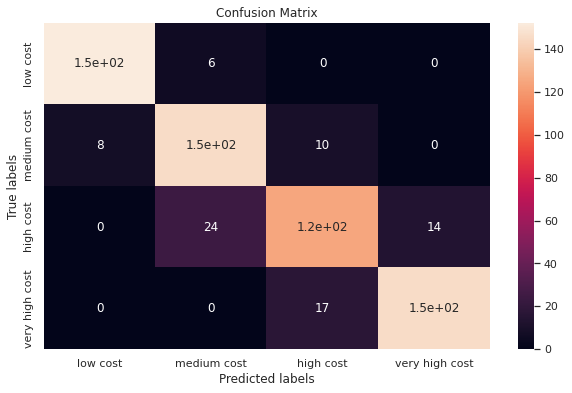

In [ ]:
# Get the confusion matrix for both train and test
plt.figure(figsize=(10,6))
labels = ['low cost','medium cost', 'high cost', 'very high cost']
cm = confusion_matrix(y_test, y_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

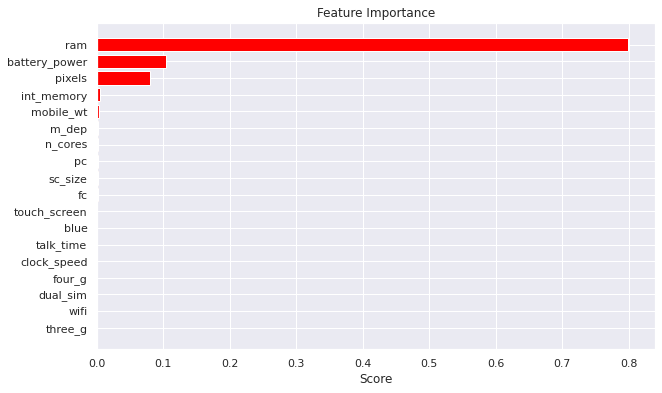

In [ ]:
# creating a function for plotting the feature importances.
plt.figure(figsize=(10,6))
features = X.columns
importances = gbc_optimal.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Score')
plt.show()

Here 'ram' , 'battery_power' and ' pixcels' are the high important features.

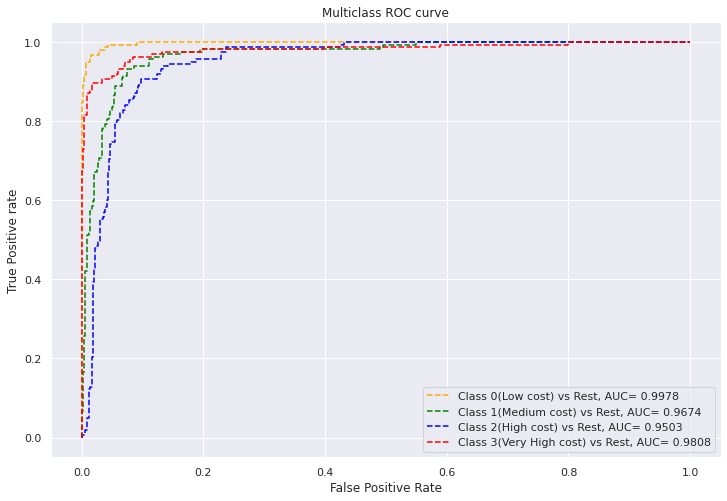

In [ ]:
# Calculate roc_auc score on train set
pred_prob = gbc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

Here All AUC score are good though there is some difference in all four class

# 4. XGboost classifier

In [ ]:
# Scaling values of X
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# splitting the data into Train data and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [ ]:
# creating an object of the XGboost_classifier.
XGBC=XGBClassifier(max_depth = 5, learning_rate = 0.1)

In [ ]:
# fitting/training the model.
XGBC.fit(X_train,y_train)

XGBClassifier(max_depth=5, objective='multi:softprob')

In [ ]:
# predicting the y values of train set and test set.
y_train_pred=XGBC.predict(X_train)
y_pred=XGBC.predict(X_test)

In [ ]:
# Checking the accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
# Checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.9089506172839507

[[154   4   0   0]
 [  8 146  10   0]
 [  0  15 138  10]
 [  0   0  12 151]]


[Text(0, 0.5, 'low cost'),
 Text(0, 1.5, 'medium cost'),
 Text(0, 2.5, 'high cost'),
 Text(0, 3.5, 'very high cost')]

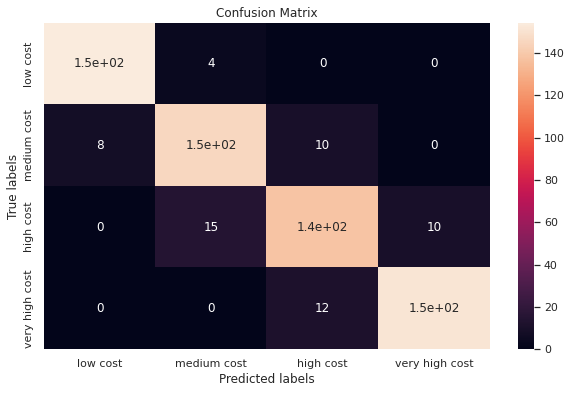

In [ ]:
# Get the confusion matrix for both train and test
plt.figure(figsize=(10,6))
labels = ['low cost','medium cost', 'high cost', 'very high cost']
cm = confusion_matrix(y_test, y_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Applying GridSearchCV
grid_values = {'n_estimators': (10, 200), 'learning_rate': [1, 0.5, 0.1, 0.01, 0.001], 'max_depth': (5, 10),'gamma': [1.5, 1.8], 'subsample': [0.3, 0.5, 0.8]}
xgbc_tune = GridSearchCV(XGBC, param_grid = grid_values, scoring = 'roc_auc', cv=5)
# Fit the object to train dataset
xgbc_tune.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(max_depth=5, objective='multi:softprob'),
             param_grid={'gamma': [1.5, 1.8],
                         'learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'max_depth': (5, 10), 'n_estimators': (10, 200),
                         'subsample': [0.3, 0.5, 0.8]},
             scoring='roc_auc')

In [ ]:
#Getting best paramters for the models
xgbc_tune.best_params_

{'gamma': 1.5,
 'learning_rate': 1,
 'max_depth': 5,
 'n_estimators': 10,
 'subsample': 0.3}

In [ ]:
#Getting best estimator for the models
gbc_tune.best_estimator_

GradientBoostingClassifier(n_estimators=50, random_state=0)

In [ ]:
xgbc_optimal=XGBClassifier(max_features='auto',max_depth=3,n_estimators=50,random_state=0)
xgbc_optimal.fit(X_train,y_train)

XGBClassifier(max_features='auto', n_estimators=50, objective='multi:softprob')

In [ ]:
# predicting y values of train and test set.
y_train_pred=xgbc_optimal.predict(X_train)
y_pred=xgbc_optimal.predict(X_test)

In [ ]:
# checking the train accuracy score.
accuracy_score(y_train,y_train_pred)

0.9345509893455098

In [ ]:
# checking the test accuracy score.
accuracy_score(y_test,y_pred)

0.875

In [ ]:
# lets chcek with evaluation matrix which is used for classification
print('classification report for train data')
print(classification_report(y_train,y_train_pred))
print('classification report for test data')
print(classification_report(y_test,y_pred))

classification report for train data
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       336
           1       0.90      0.91      0.91       327
           2       0.90      0.90      0.90       328
           3       0.97      0.95      0.96       323

    accuracy                           0.93      1314
   macro avg       0.93      0.93      0.93      1314
weighted avg       0.93      0.93      0.93      1314

classification report for test data
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       158
           1       0.82      0.87      0.84       164
           2       0.81      0.77      0.79       163
           3       0.92      0.91      0.91       163

    accuracy                           0.88       648
   macro avg       0.88      0.88      0.88       648
weighted avg       0.88      0.88      0.87       648



[[151   7   0   0]
 [  7 143  14   0]
 [  0  25 125  13]
 [  0   0  15 148]]


[Text(0, 0.5, 'low cost'),
 Text(0, 1.5, 'medium cost'),
 Text(0, 2.5, 'high cost'),
 Text(0, 3.5, 'very high cost')]

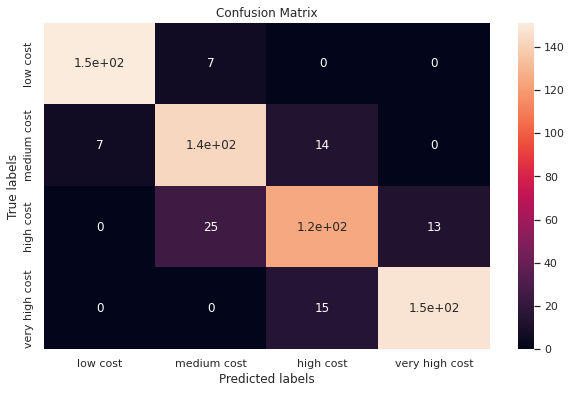

In [ ]:
# Get the confusion matrix for both train and test
plt.figure(figsize=(10,6))
labels = ['low cost','medium cost', 'high cost', 'very high cost']
cm = confusion_matrix(y_test, y_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

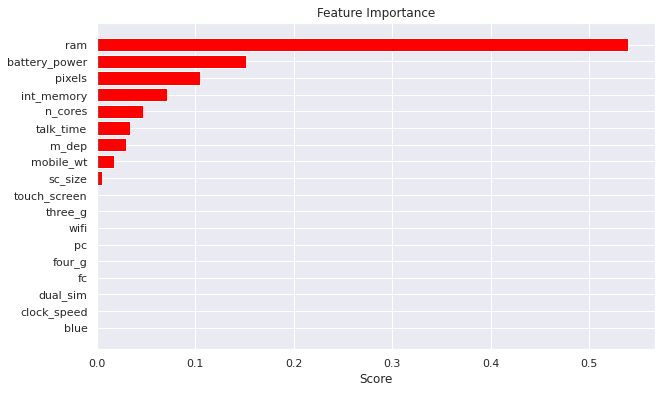

In [ ]:
# creating a function for plotting the feature importances.
plt.figure(figsize=(10,6))
features = X.columns
importances = xgbc_optimal.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Score')
plt.show()

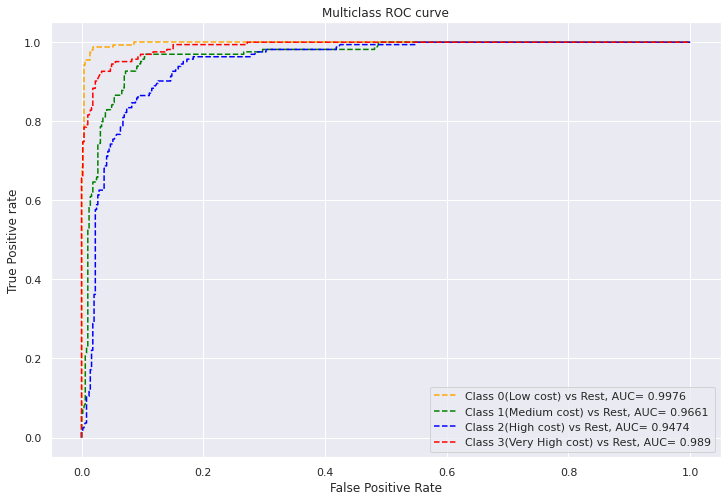

In [ ]:
# Calculate roc_auc score on train set
pred_prob = xgbc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

#5. SVM

In [ ]:
# Import relevant libraries

from sklearn.svm import SVC

In [ ]:
# splitting the data into Train data and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [ ]:
# creating an object of the SVM.
svc=SVC(C=10,random_state=101)

In [ ]:
# fitting/training the model.
svc.fit(X_train,y_train)

SVC(C=10, random_state=101)

In [ ]:
# predicting the y values of train set and test set.
y_train_pred=svc.predict(X_train)
y_pred=svc.predict(X_test)

In [ ]:
# Checking the accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
# Checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.8317901234567902

[[146  12   0   0]
 [ 11 136  17   0]
 [  0  20 123  20]
 [  0   0  29 134]]


[Text(0, 0.5, 'low cost'),
 Text(0, 1.5, 'medium cost'),
 Text(0, 2.5, 'high cost'),
 Text(0, 3.5, 'very high cost')]

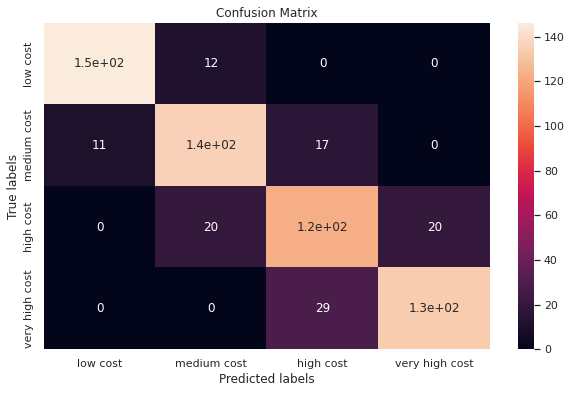

In [ ]:
# Get the confusion matrix for both train and test
plt.figure(figsize=(10,6))
labels = ['low cost','medium cost', 'high cost', 'very high cost']
cm = confusion_matrix(y_test, y_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Applying GridSearchCV
grid_values = {'C':[0.01,0.1,1,10],'kernel' : ["linear","poly","rbf","sigmoid"],'degree' : [1,3,5,7],'gamma' : [0.01,1]}
svc_tune = GridSearchCV(svc, param_grid = grid_values, scoring = 'roc_auc', cv=5)
# Fit the object to train dataset
svc_tune.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(C=10, random_state=101),
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [1, 3, 5, 7],
                         'gamma': [0.01, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='roc_auc')

In [ ]:
#Getting best paramters for the models
svc_tune.best_params_

In [ ]:
#Getting best estimator for the models
svc_tune.best_estimator_

In [ ]:
svc_optimal=SVC(C=10, degree=1, gamma=0.01, kernel='linear',random_state=101)
svc_optimal.fit(X_train,y_train)

In [ ]:
# predicting y values of train and test set.
y_train_pred=svc_optimal.predict(X_train)
y_pred=svc_optimal.predict(X_test)

In [ ]:
# checking the train accuracy score.
accuracy_score(y_train,y_train_pred)

In [ ]:
# checking the test accuracy score.
accuracy_score(y_test,y_pred)

In [ ]:
# lets chcek with evaluation matrix which is used for classification
print('classification report for train data')
print(classification_report(y_train,y_train_pred))
print('classification report for test data')
print(classification_report(y_test,y_pred))

In [ ]:
# Get the confusion matrix for both train and test
plt.figure(figsize=(10,6))
labels = ['low cost','medium cost', 'high cost', 'very high cost']
cm = confusion_matrix(y_test, y_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()
f_importances(svc_optimal.coef_, X.columns)

ValueError: ignored

In [ ]:
# creating a function for plotting the feature importances.
plt.figure(figsize=(10,6))
features = X.columns
importances = svc_optimal.Coef_
indices = np.argsort(importances)
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Score')
plt.show()

In [ ]:
# Calculate roc_auc score on train set
pred_prob = svc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

##Conclusion